In [2]:
import meep as mp
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys
sys.path.append('../../metamaterials')
from metamaterials import lithography as lt

Using MPI version 4.0, 1 processes


/home/gridsan/mcomella/.conda/envs/pmp/lib/python3.10/site-packages/numpy/core/getlimits.py:500: UserWarning: The value of the smallest subnormal for <class 'numpy.float64'> type is zero.
  setattr(self, word, getattr(machar, word).flat[0])
/home/gridsan/mcomella/.conda/envs/pmp/lib/python3.10/site-packages/numpy/core/getlimits.py:89: UserWarning: The value of the smallest subnormal for <class 'numpy.float64'> type is zero.
  return self._float_to_str(self.smallest_subnormal)
/home/gridsan/mcomella/.conda/envs/pmp/lib/python3.10/site-packages/numpy/core/getlimits.py:500: UserWarning: The value of the smallest subnormal for <class 'numpy.float32'> type is zero.
  setattr(self, word, getattr(machar, word).flat[0])
/home/gridsan/mcomella/.conda/envs/pmp/lib/python3.10/site-packages/numpy/core/getlimits.py:89: UserWarning: The value of the smallest subnormal for <class 'numpy.float32'> type is zero.
  return self._float_to_str(self.smallest_subnormal)


In [3]:
powers = np.linspace(np.sqrt(0.05), np.sqrt(.2), 10)**2 # Range of powers in W
speeds = np.linspace(np.sqrt(100), np.sqrt(300), 10)**2 # Range of speeds in mm/s
pixel_size = 1e-3 # Pixel size in mm

T = 0.8 # Period in mm
w = 0.3 # Width in mm
t = 0.05 # Thickness in mm

gel_size = 10 # Size of gel in mm

In [4]:
block = mp.Block(mp.Vector3(w,w,t))

n, m = len(powers), len(speeds)
i, j = 0, 0
mat = lt.draw_block(block, 0, 0, speed=1, power=1, dx=pixel_size, lightweight=True)

In [5]:
M = pd.DataFrame(columns=['xi', 'yi', 'pi', 'xf', 'yf', 'pf', 't', 'X', 'Y', 'Z'])

Pmax = 0.3 # Maximum power in W

n, m = len(powers), len(speeds)
i, j = 0, 0
for pwr in powers:
    for speed in speeds:
        mt = mat.copy()

        mt['t'] = w/speed
        mt['pi'] = pwr / Pmax
        mt['pf'] = pwr / Pmax
        x_offset = (i-n/2+1/2) * T
        y_offset = (j-m/2+1/2) * T

        mt['X'] = mt['X'] + x_offset
        mt['Y'] = mt['Y'] + y_offset

        j += 1
        M = pd.concat([M, mt])
        
    j = 0
    i += 1

In [6]:
M

,xi,yi,pi,xf,yf,pf,t,X,Y,Z
0,-0.150,-0.15,0.166667,-0.150,0.15,0.166667,0.003,-3.6,-3.6,-0.025
0,-0.149,-0.15,0.166667,-0.149,0.15,0.166667,0.003,-3.6,-3.6,-0.025
0,-0.148,-0.15,0.166667,-0.148,0.15,0.166667,0.003,-3.6,-3.6,-0.025
0,-0.147,-0.15,0.166667,-0.147,0.15,0.166667,0.003,-3.6,-3.6,-0.025
0,-0.146,-0.15,0.166667,-0.146,0.15,0.166667,0.003,-3.6,-3.6,-0.025
...,...,...,...,...,...,...,...,...,...,...
0,0.144,-0.15,0.666667,0.144,0.15,0.666667,0.001,3.6,3.6,0.024
0,0.145,-0.15,0.666667,0.145,0.15,0.666667,0.001,3.6,3.6,0.024
0,0.146,-0.15,0.666667,0.146,0.15,0.666667,0.001,3.6,3.6,0.024
0,0.147,-0.15,0.666667,0.147,0.15,0.666667,0.001,3.6,3.6,0.024


In [7]:
# Total time
M['t'].sum()/3600

0.7317713456617916

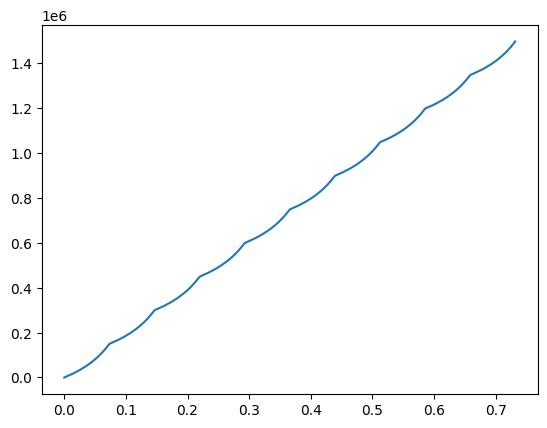

In [8]:
a = np.array(M['t'])
# Accumulated values
b = np.cumsum(a)/3600
plt.plot(b, np.arange(len(a)))

In [9]:
lt.save_to_matlab(M, 'pwr_test4.mat')

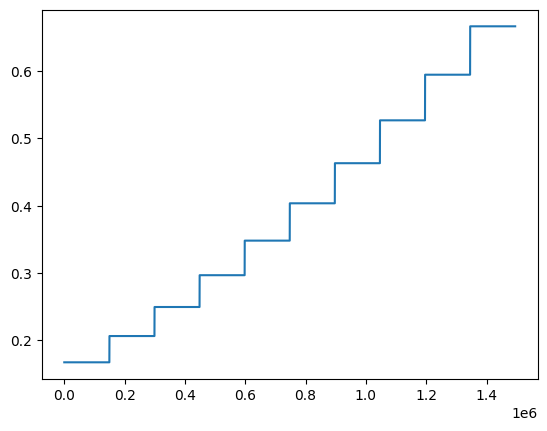

In [10]:
plt.plot(np.array(M['pi']))